In [151]:
import datetime
import pandas as pd
# import pandas_ta as pata
import numpy as np
import ta 
import matplotlib as mpl
import tensorflow as tf

import matplotlib.pyplot as plt


In [152]:
df = pd.read_csv('../data/meta_sp500.csv')

date = df.pop('Date')
time = df.pop('Time')
df['Date_Time']=date+time

date_time = pd.to_datetime(df.pop('Date_Time'),
                           format='%Y.%m.%d %H:%M:%S')

df.head()

,Open,High,Low,Close,TickVol,Volume,Spread
0,3322.2,3323.9,3322.2,3323.9,40,0,6
1,3323.9,3326.2,3323.4,3326.2,59,0,6
2,3326.2,3326.7,3323.2,3323.4,92,0,6
3,3323.4,3324.8,3323.2,3323.2,54,0,6
4,3322.2,3322.2,3319.2,3319.7,98,0,1


In [153]:

window_size = 256

In [154]:
def plot(name):
    mean = df.mean()
    std = df.std()
    df_std =(df-mean)/std

    real = df[name]
    real.index = date_time

    std_real = df_std[name]
    std_real.index = date_time

    fig, axs = plt.subplots(2)
    axs[0].plot(real)
    axs[1].plot(std_real)

In [155]:
# SMA -> Simple moving average

# df['SMA_10'] = df['Close'].rolling(window=10).mean()
# df['SMA_20'] = df['Close'].rolling(window=20).mean()
# df['SMA_50'] = df['Close'].rolling(window=50).mean()
# df['SMA_100'] = df['Close'].rolling(window=100).mean()
# df['SMA_200'] = df['Close'].rolling(window=200).mean()
# df[f'SMA_{window_size}'] = df['Close'].rolling(window=window_size).mean()


# plot('SMA_10')


In [156]:
# df['EMA'] = df['Close'].ewm(span= window_size , adjust=False).mean()

# df
# ema_10=ta.trend.EMAIndicator(df['Close'],window=10)
# ema_20=ta.trend.EMAIndicator(df['Close'],window=20)
# ema_50=ta.trend.EMAIndicator(df['Close'],window=50)
# ema_100=ta.trend.EMAIndicator(df['Close'],window=100)
# ema_200=ta.trend.EMAIndicator(df['Close'],window=200)
# ema_windowsize=ta.trend.EMAIndicator(df['Close'],window=window_size)

# df['EMA_10']=ema_10.ema_indicator()
# df['EMA_20']=ema_10.ema_indicator()
# df['EMA_50']=ema_10.ema_indicator()
# df['EMA_100']=ema_10.ema_indicator()
# df['EMA_200']=ema_10.ema_indicator()
# df[f'EMA_{window_size}']=ema_10.ema_indicator()

# name = 'EMA_100'
# plot(name)



In [157]:
# #MACD

# macd=ta.trend.MACD(df['Close'])
# df['MACD']=macd.macd()
# df['MACD_Signal']=macd.macd_signal()
# df['MACD_Diff']=macd.macd_diff()

# plot('MACD')


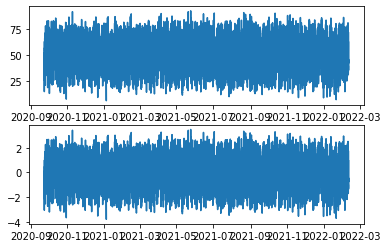

In [158]:
#RSI

rsi = ta.momentum.RSIIndicator(df['Close'])
df['RSI']= rsi.rsi()

plot('RSI')


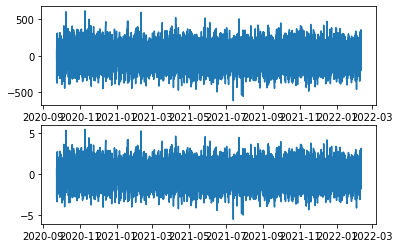

In [159]:
#CCI

CCI = ta.trend.CCIIndicator(high=df['High'],low=df['Low'],close=df['Close'])
df['CCI']=CCI.cci()

plot('CCI')

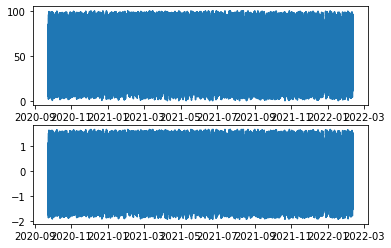

In [160]:
Stochastic= ta.momentum.StochasticOscillator(close=df['Close'],high=df['High'],low=df['Low'])
df['STOCH']=Stochastic.stoch()
df['STOCH_SIGNAL']=Stochastic.stoch_signal()


plot('STOCH_SIGNAL')

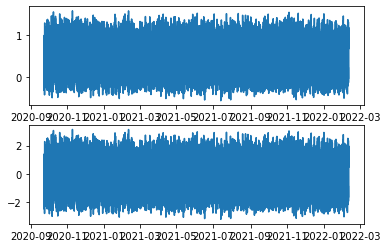

In [161]:
#Bollinger Bands

Bollinger = ta.volatility.BollingerBands(close=df['Close'])
# df['MA20'] = df['Close'].rolling(window=20).mean()
# df['20dSTD'] = df['Close'].rolling(window=20).std() 

# df['Upper'] = df['MA20'] + (df['20dSTD'] * 2)
# df['Lower'] = df['MA20'] - (df['20dSTD'] * 2)
# df.tail()

# df['Boll_High']=Bollinger.bollinger_hband()
# df['Boll_Low']=Bollinger.bollinger_lband()
# df['Boll_AVG']=Bollinger.bollinger_mavg()
df['Boll_Percent']=Bollinger.bollinger_pband()

plot('Boll_Percent')


In [162]:
# ATR = ta.volatility.AverageTrueRange(close=df['Close'],high=df['High'],low=df['Low'])
# df['ATR']=ATR.average_true_range()

# plot('ATR')

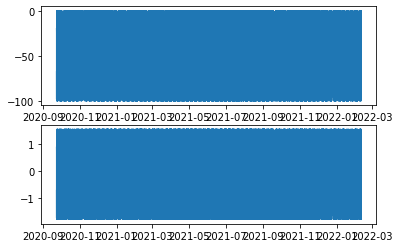

In [163]:

#Williams %R

WilliamsRIndicator=ta.momentum.WilliamsRIndicator(close=df['Close'],high=df['High'],low=df['Low'])
df['WILL_R']=WilliamsRIndicator.williams_r()

plot('WILL_R')

In [164]:

# OBV= ta.volume.OnBalanceVolumeIndicator(close=df['Close'],volume=df['Volume'])
# df['OBV']=OBV.on_balance_volume()

# plot('OBV')


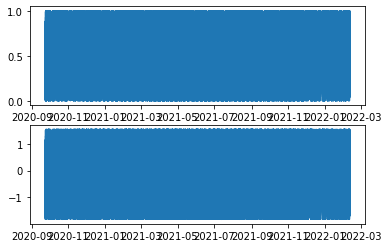

In [165]:
dcc= ta.volatility.DonchianChannel(high=df['High'],low=df['Low'],close=df['Close'])
# df['DON_CHIAN_hband']=dcc.donchian_channel_hband()
# df['DON_CHIAN_lband']=dcc.donchian_channel_lband()
# df['DON_CHIAN_mband']=dcc.donchian_channel_mband()
df['DON_CHIAN_pband']=dcc.donchian_channel_pband()

plot('DON_CHIAN_pband')

In [166]:
# vwap = ta.volume.VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume'])
# df['VWAP']=vwap.volume_weighted_average_price()

# plot('VWAP')

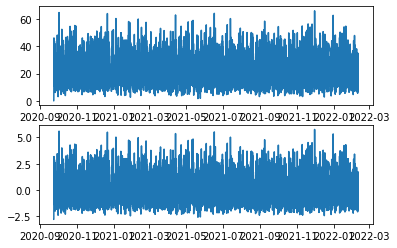

In [167]:
ADX=ta.trend.ADXIndicator(high=df['High'],low=df['Low'],close=df['Close'])
df['ADX_Pos']=ADX.adx_pos()
df['ADX_Neg']=ADX.adx_neg()

plot('ADX_Neg')

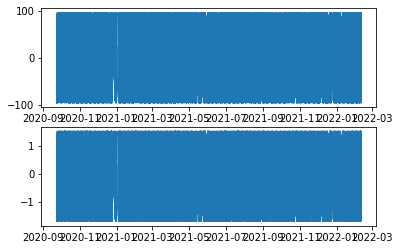

In [168]:
Aroon = ta.trend.AroonIndicator(close=df['Close'])
df['Aroon']= Aroon.aroon_indicator()

plot('Aroon')

In [169]:
# MFI = ta.volume.MFIIndicator(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume'])
# df['MFI']=MFI.money_flow_index()

# plot('MFI')

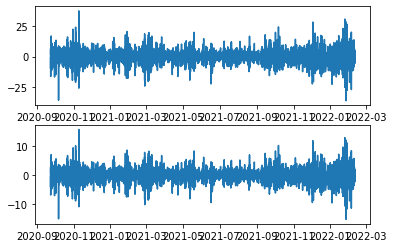

In [170]:

candel_body = []
candel_body = (df['Close']-df['Open'])
df['Candel_Body'] = candel_body

#Calculation candel body percentage relative to last candel's closing price
# candel_body_percentage = []

# candel : float
# candel_body.append(0)

# for i in range(1,len(df['Close'])):
#     candel = (df['Close'][i] - df['Open'][i])/df['Close'][i-1]
#     candel_body.append(candel)

# df['Candel_body_percent'] = candel_body


# Calculating candel upper and lower shadow
candel_upper_shadow = []
candel_lower_shadow = []

for i in range(len(df['Candel_Body'])):
    
    if(df['Close'][i] > df['Open'][i]):
        candel_upper_shadow.append( (df['High'][i] - df['Close'][i]) )
    else:
        candel_upper_shadow.append( (df['High'][i] - df['Open'][i]) )

    if(df['Close'][i] > df['Open'][i]):
        candel_lower_shadow.append( (df['Open'][i] - df['Low'][i])  )
    else:
        candel_lower_shadow.append( (df['Close'][i] - df['Low'][i]) )

df['Candel_Upper_Shadow']=candel_upper_shadow
df['Candel_Lower_Shadow']=candel_lower_shadow  

plot('Candel_Body')

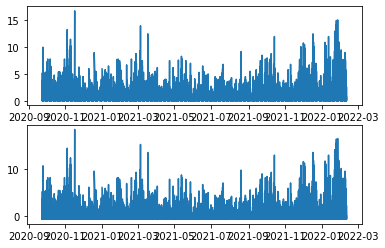

In [171]:
plot('Candel_Upper_Shadow')

In [172]:
buy_or_sell = []
buy_or_sell_number = []


def average(index:int , future_window_size:int):
    sum = 0.
    for i in range(index, index+future_window_size ):
        sum += df['Close'][i+1]

    return sum/future_window_size           

# number_of_buys = 0
# number_of_sells= 0
for i in range(len(df['Close'])-24):
    if(average(i,24)>df['Close'][i]):
        buy_or_sell.append('Buy')
        buy_or_sell_number.append(1)
        # number_of_buys = number_of_buys+1
    else:
        buy_or_sell.append('Sell')
        buy_or_sell_number.append(0)
        # number_of_sells = number_of_sells+1

for i in range(24):
    buy_or_sell.append(None)
    buy_or_sell_number.append(-1)

df['Class']= buy_or_sell
df['Class_Number'] = buy_or_sell_number

In [173]:
#REMEMBER : ONE HOT ENCODING
# indices = buy_or_sell_number.copy()
# del indices[-24:]

# depth = 2
# tf.one_hot(indices, depth)  # output: [3 x 3]

In [185]:

# df.pop('Unnamed: 0')
df_copy = df.copy()

df_copy['Date'] = date_time


df_copy = df_copy.drop(labels=[i for i in range(158)], axis=0)
df_copy = df_copy.reset_index()

df_copy = df_copy.drop(labels=[(df_copy.shape[0]-i) for i in range(1,25)] ,axis=0)
df_copy = df_copy.reset_index()

df_copy.pop('index')
df_copy.pop('level_0')

df_copy[-25:]

#SAVE HERE
# df_copy.to_csv('../data/sp500_with_indicators.csv')



In [187]:
# df_copy.plot(subplots=True)

Index(['Open', 'High', 'Low', 'Close', 'TickVol', 'Volume', 'Spread', 'RSI',
       'CCI', 'STOCH', 'STOCH_SIGNAL', 'Boll_Percent', 'WILL_R',
       'DON_CHIAN_pband', 'ADX_Pos', 'ADX_Neg', 'Aroon', 'Candel_Body',
       'Candel_Upper_Shadow', 'Candel_Lower_Shadow', 'Class', 'Class_Number',
       'Date'],
      dtype='object')